## Плугатирьов Дмитро ІП-15

# Комп'ютерний практикум №1

## Залежності

In [148]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Налаштування виводу на екран

In [149]:
def plot_histogram(values: np.ndarray, bins: int, title: str, color: str = 'blue') -> plt.Axes:
    _, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(title)
    ax.set_xlabel('Значення')
    ax.set_ylabel('Частота')
    ax.grid(True)
    ax.hist(values, bins=bins, color=color)
    return ax

def format_mean_std(mean_std: tuple, title):
    mean, std = mean_std
    return f'{title}: \nСереднє: {mean:.3f}, Std: {std:.3f}'

def format_chi2_info(chi2, chi2_k, title):
    return f'{title}: \nChi^2: {chi2:.3f}, Chi^2 k: {chi2_k}'

## Обчислення значень

In [150]:
def get_sturges_bin_count(sample_size: int) -> int:
    """Розраховує оптимальну кількість інтервалів за правилом Стерджеса."""
    return math.ceil(math.log2(sample_size) + 1)

def get_bin_intervals(bin_edges : np.ndarray) -> list[tuple[float, float]]:
    """Перетворює масив меж [0, 5, 10] на пари [(0, 5), (5, 10)]."""
    return [(bin_edges[idx - 1], bin_edges[idx]) for idx in range(1, bin_edges.size)]

def calculate_sample_stats(data: np.ndarray) -> tuple[float, float]:
    """Повертає середнє (mean) та стандартне відхилення (std) вибірки."""
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    return (mean, std)

# Chi2 з таблиці (заздалегідь визначена) (функція відсоткової точки - ppf)
def get_chi2_critical_value(alpha: float, num_bins: int, num_params: int) -> float:
    """
    Повертає критичне значення з таблиці розподілу.
    df (degrees of freedom) = кількість інтервалів - кількість оцінених параметрів - 1
    """
    degrees_of_freedom = num_bins - num_params - 1
    return stats.chi2.ppf(1 - alpha, df=degrees_of_freedom)

# Chi2 розраховується за формулою
def calculate_chi2(items_amt, values, bins, compute_step, *args):
    bins_pairs = get_bin_intervals(bins)
    probabilities_expected = np.array(
        [compute_step(left, right, *args) for left, right in bins_pairs]
    )
    
    values_expected = items_amt * probabilities_expected
    chi2 = np.sum(np.square(values - values_expected) / values_expected)
    return chi2

def is_matching_chi2_law(chi2, chi2_k):
    return chi2 <= chi2_k

# Експоненційний закон розподілу

## Налаштування графіку гістограми

In [151]:
numbers_to_generate = 10000
exponential_bins = get_sturges_bin_count(numbers_to_generate)
print('Відсіки для гістограми Експоненціальна:', exponential_bins)

Відсіки для гістограми Експоненціальна: 15


## Формулювання закону розподілу

In [152]:
lambda_param = 4
uniform_samples = np.random.uniform(size=numbers_to_generate)
exponential_samples = -1 / lambda_param * np.log(uniform_samples)
exponential_samples

array([0.00481847, 0.04820474, 0.22988129, ..., 0.07536404, 0.42543592,
       0.00380662])

## Побудова графіку для перевірки закону

[4857 2516 1255  662  344  157   94   54   30   15    6    2    4    1
    3] [1.99358509e-05 1.66044465e-01 3.32068995e-01 4.98093524e-01
 6.64118054e-01 8.30142584e-01 9.96167113e-01 1.16219164e+00
 1.32821617e+00 1.49424070e+00 1.66026523e+00 1.82628976e+00
 1.99231429e+00 2.15833882e+00 2.32436335e+00 2.49038788e+00]


<Axes: title={'center': 'Закон - Експоненціальний'}, xlabel='Значення', ylabel='Частота'>

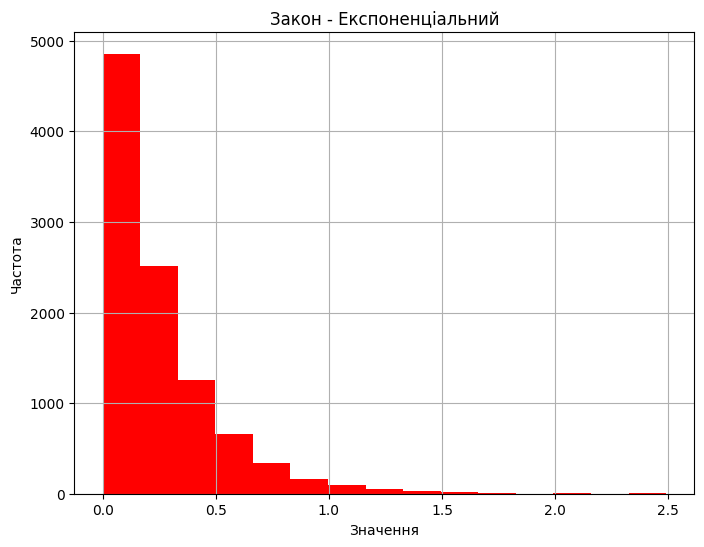

In [153]:
counts, bins = np.histogram(exponential_samples, bins=exponential_bins)
print(counts, bins)
plot_histogram(exponential_samples, exponential_bins, title='Закон - Експоненціальний', color='red')

## Статистика за законом

In [154]:
exponential_stats = calculate_sample_stats(exponential_samples)
exponential_mean, exponential_std = exponential_stats
fmt = format_mean_std(exponential_stats, 'Експоненціальний')
print(fmt)

Експоненціальний: 
Середнє: 0.251, Std: 0.255


## Перевірка за критерієм згоди xi^2

In [155]:
def calculate_exponential_step(left, right, lambda_value):
    return np.exp(-lambda_value * left) - np.exp(-lambda_value * right)

lambda_expected = 1 / exponential_mean
exponential_chi2 = calculate_chi2(numbers_to_generate, counts, bins, 
                                calculate_exponential_step, lambda_expected)
exponential_chi2_k = get_chi2_critical_value(0.05, exponential_bins, 1)
fmt = format_chi2_info(exponential_chi2, exponential_chi2_k, 'Експоненціальний')
print(fmt)

Експоненціальний: 
Chi^2: 23.644, Chi^2 k: 22.362032494826934


In [156]:
if is_matching_chi2_law(exponential_chi2, exponential_chi2_k):
    print("Експоненціальний закон працює!")
else:
    print("Експоненціальний закон не працює!")

Експоненціальний закон не працює!


# Нормальний закон розподілу

## Налаштування графіку гістограми

In [157]:
numbers_to_generate = 10000
normal_init_bins = get_sturges_bin_count(numbers_to_generate)
print('Відсіки для гістограми нормального розподілу:', exponential_bins)

Відсіки для гістограми нормального розподілу: 15


## Формулювання закону розподілу

In [158]:
sigma_value = 4
a_value = -5

normal_law = np.zeros(numbers_to_generate)
for idx in range(numbers_to_generate):
    mu_value = np.random.uniform(size=12).sum() - 6
    normal_law[idx] = sigma_value * mu_value + a_value
normal_law

array([-5.89258036, -8.54342469, -9.87913302, ..., -4.59800677,
       -7.19657443, -6.88525762])

## Побудова графіку для перевірки закону

<Axes: title={'center': 'Закон - Нормальний розподіл'}, xlabel='Значення', ylabel='Частота'>

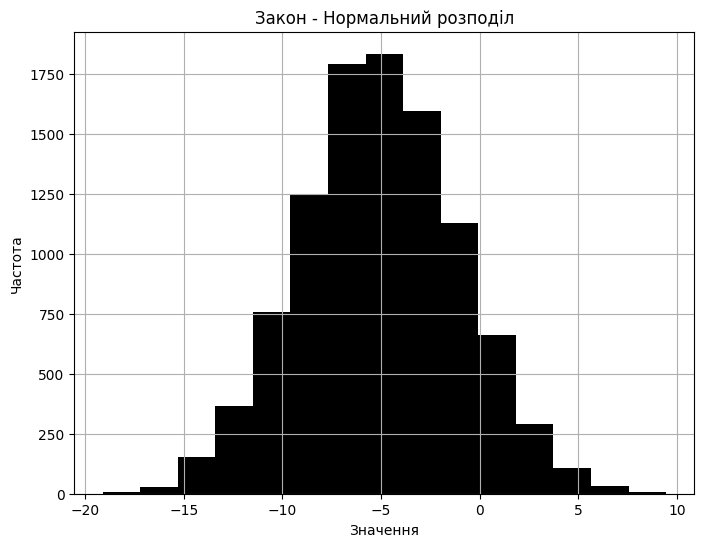

In [159]:
normal_counts, normal_bins = np.histogram(normal_law, bins=normal_init_bins)
plot_histogram(normal_law, normal_bins, title='Закон - Нормальний розподіл', color='black')

## Статистика за законом

In [160]:
normal_stats = calculate_sample_stats(normal_law)
normal_mean, normal_std = normal_stats
fmt = format_mean_std(normal_stats, 'Нормальний розподіл')
print(fmt)

Нормальний розподіл: 
Середнє: -5.060, Std: 4.017


## Перевірка за критерієм згоди xi^2

In [161]:
# Кумулятивна функція розподілу - cdf
def calculate_normal_step(left, right, sigma_value, a_value):
    left_cdf, right_cdf = stats.norm.cdf([left, right], loc=sigma_value, scale=a_value)
    return right_cdf - left_cdf

sigma_expected = normal_mean
normal_expected = normal_std
normal_chi2 = calculate_chi2(numbers_to_generate, normal_counts, normal_bins, 
                            calculate_normal_step, sigma_expected, normal_expected)
normal_chi2_k = get_chi2_critical_value(0.05, normal_init_bins, 2)
fmt = format_chi2_info(normal_chi2, normal_chi2_k, 'Нормальний розподіл')
print(fmt)

Нормальний розподіл: 
Chi^2: 11.105, Chi^2 k: 21.02606981748307


In [162]:
if is_matching_chi2_law(normal_chi2, normal_chi2_k):
    print("Закон нормального розподілу працює!")
else:
    print("Закон нормального розподілу не працює!")

Закон нормального розподілу працює!


# Рівномірний закон розподілу

## Конфігурація графіку гістограми

In [163]:
numbers_to_generate = 10000
uniform_init_bins = get_sturges_bin_count(numbers_to_generate)
print('Відсіки для Закону рівномірного розподілу:', uniform_init_bins)

Відсіки для Закону рівномірного розподілу: 15


## Формуляція закону розподілу

In [164]:
a_value = 5**13
c_value = 2**31
zi_value = np.random.uniform()

uniform_law = np.zeros(numbers_to_generate)
for idx in range(numbers_to_generate):
    zi_value = (a_value * zi_value) % c_value
    uniform_law[idx] = zi_value / c_value
uniform_law


array([0.52767664, 0.41629374, 0.66860592, ..., 0.47980356, 0.72010088,
       0.12742853])

## Побудова графіку для перевірки закону

<Axes: title={'center': 'Закон - Рівномірний розподіл'}, xlabel='Значення', ylabel='Частота'>

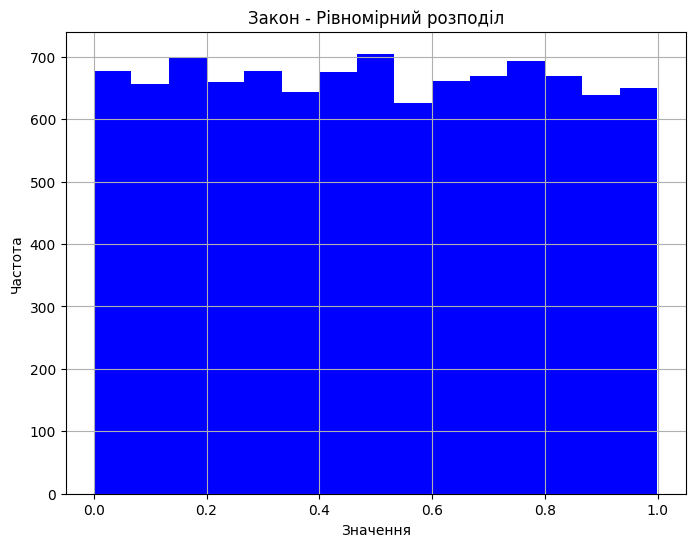

In [165]:
uniform_counts, uniform_bins = np.histogram(uniform_law, bins=uniform_init_bins)
plot_histogram(uniform_law, uniform_bins, title='Закон - Рівномірний розподіл', color='blue')

## Статистика за законом

In [166]:
uniform_stats = calculate_sample_stats(uniform_law)
uniform_mean, uniform_std = uniform_stats
fmt = format_mean_std(uniform_stats, 'Рівномірний розподіл')
print(fmt)

Рівномірний розподіл: 
Середнє: 0.498, Std: 0.288


## Перевірка за критерієм згоди xi^2

In [167]:
def calculate_uniform_step(left, right, a_value, c_value):
    return (right - left) / (c_value - a_value)

a_expected = uniform_mean - 3 ** 0.5 * uniform_std
c_expected = uniform_mean + 3 ** 0.5 * uniform_std
uniform_chi2 = calculate_chi2(numbers_to_generate, uniform_counts, uniform_bins,
                            calculate_uniform_step, a_expected, c_expected)
uniform_chi2_k = get_chi2_critical_value(0.05, uniform_init_bins, 2)
fmt = format_chi2_info(uniform_chi2, uniform_chi2_k, 'Рівномірний розподіл')
print(fmt)

Рівномірний розподіл: 
Chi^2: 10.563, Chi^2 k: 21.02606981748307


In [168]:
if is_matching_chi2_law(uniform_chi2, uniform_chi2_k):
    print("Закон рівномірного розподілу працює!")
else:
    print("Закон рівномірного розподілу не працює!")

Закон рівномірного розподілу працює!
